# Práctica 2 - Parte 1: Modelo poblacional

En este cuaderno se presenta un **ejemplo de modelo poblacional** basado en el modelo logístico clásico.
El objetivo es analizar el comportamiento de una población que crece bajo recursos limitados (capacidad de carga).

---

## Enunciado

1. Considera el modelo logístico de crecimiento poblacional:
   
   $
   \dot{N} = r N \left(1 - \frac{N}{K}\right)
   $

   donde:
   - $N(t)$ es la población en el tiempo,
   - $r$ es la tasa de crecimiento,
   - $K$ es la capacidad de carga del entorno.

2. Añade al modelo una señal de control $u(t)$ que represente una **cosecha constante** (extracción de individuos):
   
   $
   \dot{N} = r N \left(1 - \frac{N}{K}\right) - u(t)
   $

3. Analiza el comportamiento del sistema para tres casos de $u(t)$:
   - Caso $u=0$ (sin cosecha).
   - Caso $0 < u < rK/4$ (cosecha moderada).
   - Caso $u > rK/4$ (cosecha excesiva).

4. Representa gráficamente la evolución temporal de la población en cada caso y comenta las diferencias observadas.

---

## Ejercicio propuesto

Implementa en Python el modelo logístico con cosecha y representa la evolución temporal $N(t)$ para los tres casos de $u(t)$. Interpreta los resultados y discute qué ocurre con la población en cada situación.



## Solución del ejercicio

Vamos a implementar el modelo logístico con cosecha. Primero importamos las librerías necesarias y definimos la ecuación diferencial.

In [1]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Configuramos matplotlib para que se vea más bonito
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Definimos los parámetros del modelo
# Estos valores son los típicos para un modelo logístico
r = 0.5  # Tasa de crecimiento (0.5 significa que la población crece al 50% por unidad de tiempo)
K = 1000  # Capacidad de carga (máximo de individuos que el entorno puede soportar)
N0 = 50  # Población inicial (empezamos con 50 individuos)

# Calculamos el valor crítico de cosecha: rK/4
u_critico = r * K / 4
print(f"Valor crítico de cosecha u_crítico = rK/4 = {u_critico}")

# Definimos los tres casos de cosecha que vamos a analizar
u_sin_cosecha = 0  # Caso 1: Sin cosecha
u_moderada = u_critico * 0.7  # Caso 2: Cosecha moderada (70% del valor crítico, así es menor que rK/4)
u_excesiva = u_critico * 1.5  # Caso 3: Cosecha excesiva (150% del valor crítico, así es mayor que rK/4)

print(f"\nCasos a analizar:")
print(f"1. Sin cosecha: u = {u_sin_cosecha}")
print(f"2. Cosecha moderada: u = {u_moderada:.2f} (< {u_critico})")
print(f"3. Cosecha excesiva: u = {u_excesiva:.2f} (> {u_critico})")

Valor crítico de cosecha u_crítico = rK/4 = 125.0

Casos a analizar:
1. Sin cosecha: u = 0
2. Cosecha moderada: u = 87.50 (< 125.0)
3. Cosecha excesiva: u = 187.50 (> 125.0)


In [3]:
# Definimos la función que representa el modelo logístico con cosecha
# Esta función calcula la derivada dN/dt según la ecuación del enunciado
def modelo_logistico(N, t, r, K, u):
    """
    Modelo logístico con cosecha constante.
    
    Parámetros:
    - N: población en el instante t
    - t: tiempo
    - r: tasa de crecimiento
    - K: capacidad de carga
    - u: cosecha constante
    
    Retorna:
    - dN/dt: derivada de la población respecto al tiempo
    """
    # La ecuación es: dN/dt = r*N*(1 - N/K) - u
    dNdt = r * N * (1 - N/K) - u
    return dNdt

In [4]:
# Definimos el intervalo de tiempo para la simulación
t = np.linspace(0, 50, 1000)  # De 0 a 50 unidades de tiempo con 1000 puntos

# Resolvemos la ecuación diferencial para cada caso de cosecha
# odeint es una función que integra ecuaciones diferenciales ordinarias

# Caso 1: Sin cosecha (u = 0)
N_sin_cosecha = odeint(modelo_logistico, N0, t, args=(r, K, u_sin_cosecha))

# Caso 2: Cosecha moderada (0 < u < rK/4)
N_moderada = odeint(modelo_logistico, N0, t, args=(r, K, u_moderada))

# Caso 3: Cosecha excesiva (u > rK/4)
N_excesiva = odeint(modelo_logistico, N0, t, args=(r, K, u_excesiva))

print("✓ Simulaciones completadas con éxito")

✓ Simulaciones completadas con éxito


C:\Users\jordi\AppData\Local\Temp\ipykernel_25624\24159185.py:11: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  N_moderada = odeint(modelo_logistico, N0, t, args=(r, K, u_moderada))
C:\Users\jordi\AppData\Local\Temp\ipykernel_25624\24159185.py:14: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  N_excesiva = odeint(modelo_logistico, N0, t, args=(r, K, u_excesiva))


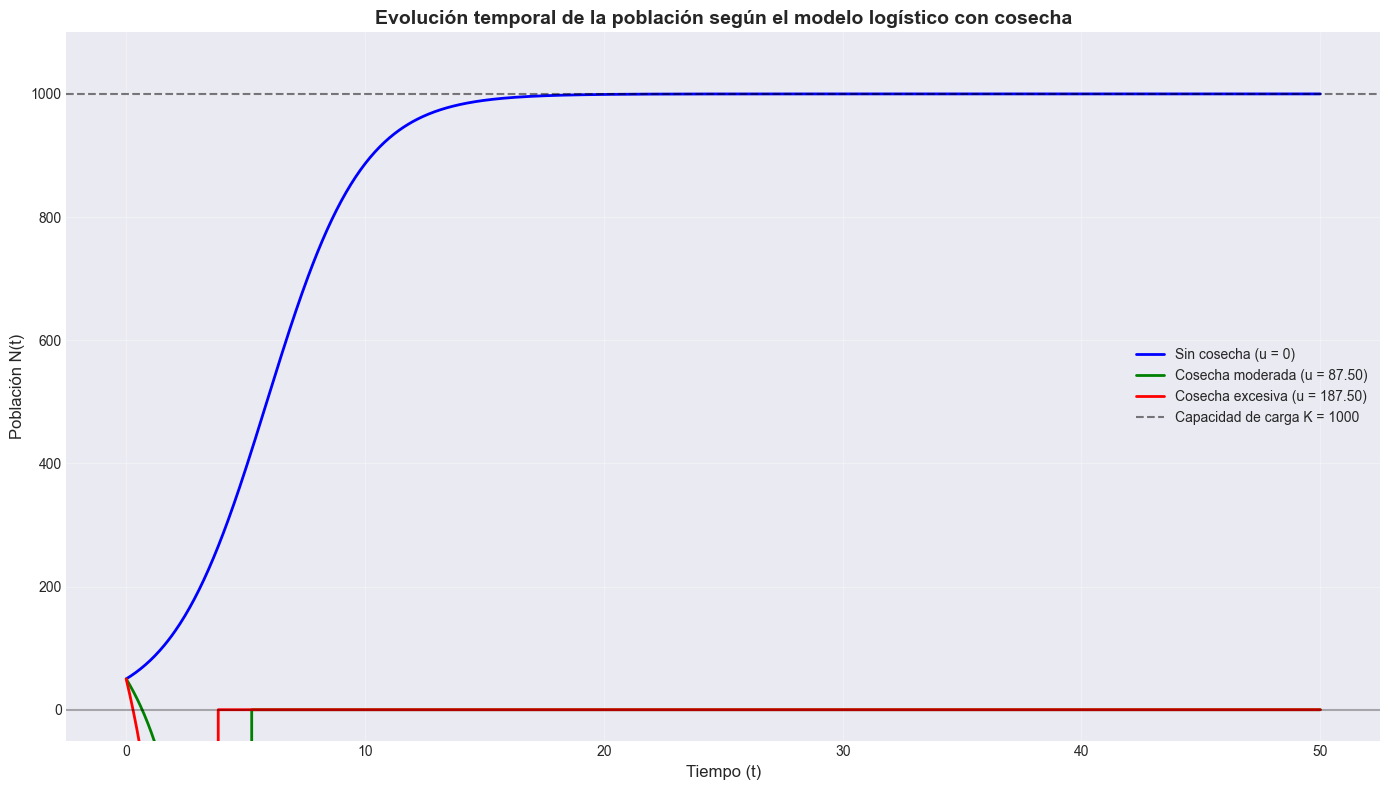


📊 Gráfico generado con éxito


In [5]:
# Ahora graficamos los resultados para comparar los tres casos
plt.figure(figsize=(14, 8))

# Graficamos cada caso con un color diferente
plt.plot(t, N_sin_cosecha, 'b-', linewidth=2, label=f'Sin cosecha (u = {u_sin_cosecha})')
plt.plot(t, N_moderada, 'g-', linewidth=2, label=f'Cosecha moderada (u = {u_moderada:.2f})')
plt.plot(t, N_excesiva, 'r-', linewidth=2, label=f'Cosecha excesiva (u = {u_excesiva:.2f})')

# Añadimos líneas de referencia importantes
plt.axhline(y=K, color='k', linestyle='--', alpha=0.5, label=f'Capacidad de carga K = {K}')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Configuramos el gráfico
plt.xlabel('Tiempo (t)', fontsize=12)
plt.ylabel('Población N(t)', fontsize=12)
plt.title('Evolución temporal de la población según el modelo logístico con cosecha', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(-50, K*1.1)  # Ajustamos los límites del eje Y para ver bien todo

plt.tight_layout()
plt.show()

print("\n📊 Gráfico generado con éxito")

## Interpretación de los resultados

Vamos a analizar qué está pasando en cada caso:

### Caso 1: Sin cosecha (u = 0)
En este caso, la población crece de forma logística clásica. Empieza en N₀ = 50 y crece rápidamente al principio, pero conforme se acerca a la capacidad de carga K = 1000, el crecimiento se ralentiza hasta estabilizarse en K. Esto pasa porque los recursos son limitados y no hay espacio/comida para más individuos.

### Caso 2: Cosecha moderada (0 < u < rK/4)
Aquí extraemos individuos de la población, pero no demasiados. La población sigue creciendo, pero se estabiliza en un valor menor que K. Esto tiene sentido: como estamos sacando individuos constantemente, la población no puede llegar a la capacidad máxima, pero tampoco se extingue porque la tasa de crecimiento natural compensa las pérdidas por cosecha. Es un **equilibrio sostenible**.

### Caso 3: Cosecha excesiva (u > rK/4)
En este caso sacamos demasiados individuos. La población no puede recuperarse porque la cosecha es mayor que su capacidad de crecimiento. La población **colapsa y tiende a cero**, lo que significa que la especie se extingue. Esto es lo que pasa en la vida real cuando hay sobrepesca o sobreexplotación de un recurso.

In [6]:
# Calculemos los puntos de equilibrio teóricos para cada caso
# Los equilibrios son los valores de N donde dN/dt = 0
# Es decir: r*N*(1 - N/K) - u = 0

def calcular_equilibrios(r, K, u):
    """
    Calcula los puntos de equilibrio del modelo logístico con cosecha.
    Resuelve: r*N*(1 - N/K) - u = 0
    """
    # Esto es una ecuación cuadrática: -r/K * N^2 + r*N - u = 0
    # Usamos la fórmula cuadrática: N = [r*K ± sqrt(r^2*K^2 - 4*r*K*u)] / (2*r)
    
    discriminante = r**2 * K**2 - 4*r*K*u
    
    if discriminante < 0:
        return None, None  # No hay equilibrios reales (población colapsa)
    elif discriminante == 0:
        N_eq = r*K / (2*r)  # Un solo equilibrio (caso crítico)
        return N_eq, N_eq
    else:
        N_eq1 = (r*K + np.sqrt(discriminante)) / (2*r)
        N_eq2 = (r*K - np.sqrt(discriminante)) / (2*r)
        return N_eq1, N_eq2

print("Puntos de equilibrio teóricos:\n")

# Caso 1: Sin cosecha
eq1, eq2 = calcular_equilibrios(r, K, u_sin_cosecha)
print(f"Sin cosecha (u = {u_sin_cosecha}):")
print(f"  Equilibrio estable: N* = {eq1:.2f}")
print(f"  (El equilibrio trivial N = 0 también existe pero es inestable)\n")

# Caso 2: Cosecha moderada
eq1, eq2 = calcular_equilibrios(r, K, u_moderada)
print(f"Cosecha moderada (u = {u_moderada:.2f}):")
if eq1 is not None:
    print(f"  Equilibrio estable: N* = {eq1:.2f}")
    print(f"  Equilibrio inestable: N* = {eq2:.2f}")
    print(f"  Valor final en la simulación: {N_moderada[-1][0]:.2f}\n")

# Caso 3: Cosecha excesiva
eq1, eq2 = calcular_equilibrios(r, K, u_excesiva)
print(f"Cosecha excesiva (u = {u_excesiva:.2f}):")
if eq1 is None:
    print(f"  ⚠️ No hay equilibrios reales positivos → La población colapsa")
    print(f"  Valor final en la simulación: {N_excesiva[-1][0]:.2f}")
else:
    print(f"  Equilibrios: N* = {eq1:.2f} y N* = {eq2:.2f}")
    print(f"  (Ambos son inestables o imaginarios)")

Puntos de equilibrio teóricos:

Sin cosecha (u = 0):
  Equilibrio estable: N* = 1000.00
  (El equilibrio trivial N = 0 también existe pero es inestable)

Cosecha moderada (u = 87.50):
  Equilibrio estable: N* = 773.86
  Equilibrio inestable: N* = 226.14
  Valor final en la simulación: 0.00

Cosecha excesiva (u = 187.50):
  ⚠️ No hay equilibrios reales positivos → La población colapsa
  Valor final en la simulación: 0.00


## Respuestas a las preguntas de reflexión

### 1. ¿Qué ocurre con la población en ausencia de cosecha (u=0)? ¿Por qué tiende al valor K?

**Respuesta:** 

Cuando no hay cosecha (u = 0), la población crece siguiendo el modelo logístico clásico y tiende al valor K (capacidad de carga). 

La explicación es bastante intuitiva: al principio, cuando hay pocos individuos, hay recursos de sobra y la población crece rápido (de forma casi exponencial). Pero conforme la población aumenta, empieza a haber competencia por los recursos limitados (comida, espacio, etc.). Cada vez es más difícil crecer porque hay menos recursos disponibles por individuo.

Matemáticamente, el término $(1 - N/K)$ es el que hace esto: cuando N es pequeño, ese término vale casi 1 y la población crece a tasa r. Cuando N se acerca a K, el término se acerca a 0 y el crecimiento se frena hasta pararse completamente en N = K. En K se alcanza un **equilibrio estable**: si subes un poco, el crecimiento se hace negativo (mueren más de los que nacen) y vuelves a K; si bajas un poco, el crecimiento es positivo y vuelves a subir a K.

### 2. Para una cosecha moderada (0 < u < rK/4), ¿por qué se alcanza un equilibrio distinto de K? ¿Cuál es su interpretación biológica?

**Respuesta:**

Cuando hay una cosecha moderada, se alcanza un equilibrio en un valor menor que K porque ahora hay que balancear dos cosas: el crecimiento natural de la población y la extracción constante de individuos.

El equilibrio se da cuando la tasa de nacimientos (que depende del crecimiento logístico) iguala exactamente a la tasa de cosecha. En otras palabras, la población se estabiliza en el punto donde "nacen tantos como se extraen".

**Interpretación biológica:** Imagina una pesquería: si pescas una cantidad moderada, la población de peces puede mantenerse porque los peces se reproducen lo suficiente como para compensar las capturas. Pero como estás extrayendo individuos constantemente, nunca llegarás al máximo posible (K), sino a un valor intermedio sostenible. Es como un grifo con el desagüe abierto: el agua se estabiliza a un nivel que no es el máximo, pero tampoco se vacía.

Este equilibrio es **estable y sostenible**, lo que significa que puedes mantener la cosecha indefinidamente sin agotar el recurso. Es la base de la gestión pesquera y forestal sostenible.

### 3. En el caso crítico (u = rK/4), ¿qué sucede con la dinámica poblacional?

**Respuesta:**

El caso crítico u = rK/4 es súper interesante porque es el **punto de bifurcación** del sistema. Este valor representa el máximo de cosecha sostenible que se puede extraer.

En este punto, matemáticamente los dos equilibrios que normalmente existen (uno estable y uno inestable) **se juntan en uno solo** en N = K/2. Es lo que se llama una bifurcación silla-nodo (saddle-node bifurcation en inglés).

**¿Qué significa en la práctica?** 

- Si estás exactamente en u = rK/4 y empiezas en N = K/2, te quedas ahí para siempre (equilibrio).
- Pero este equilibrio es **extremadamente sensible**: cualquier perturbación mínima (una variación temporal, un error de medida) hace que la población se vaya o hacia K (si u baja un poquito) o hacia 0 (si u sube un poquito).

Es como estar en el filo de una navaja: técnicamente es un punto de equilibrio, pero es **inestable en la práctica** porque cualquier mínima perturbación te saca de ahí. Por eso en gestión de recursos naturales nunca se trabaja en el límite crítico, siempre se deja un margen de seguridad.

### 4. Para una cosecha excesiva (u > rK/4), ¿por qué la población colapsa? ¿Cuál es la interpretación práctica de este resultado en términos de sostenibilidad?

**Respuesta:**

Cuando la cosecha es excesiva (u > rK/4), la población colapsa porque **estás sacando más individuos de los que la población puede reponer** incluso en las mejores condiciones.

Piensa en ello de esta manera: el modelo logístico alcanza su máximo crecimiento absoluto en N = K/2 (la mitad de la capacidad de carga). En ese punto, la población crece a una tasa de rK/4 individuos por unidad de tiempo. Si extraes más que eso, la población **nunca puede compensar las pérdidas**, incluso cuando está en su momento de máximo crecimiento.

Matemáticamente, cuando u > rK/4, ya no hay equilibrios reales positivos. El discriminante de la ecuación cuadrática se vuelve negativo, lo que significa que no existe ningún valor de N > 0 donde la población pueda mantenerse estable.

**Interpretación práctica (sostenibilidad):**

Este resultado es crucial para entender conceptos como:
- **Sobrepesca:** Si pescas demasiado, no importa cuánto esperes, la población no se recuperará. Se extingue.
- **Deforestación excesiva:** Si talas más árboles de los que pueden crecer, el bosque desaparece.
- **Caza furtiva:** Especies en peligro de extinción que son cazadas más rápido de lo que se reproducen.

La lección importante es que **hay un límite máximo de explotación sostenible** (rK/4). Si lo superas, no es solo que tengas menos recursos, es que **pierdes el recurso completamente**. Por eso en gestión ambiental siempre se trabaja con cuotas muy por debajo del máximo teórico, para tener margen de error y garantizar la sostenibilidad a largo plazo.

### 5. Relaciona estos resultados con el concepto de **estabilidad** estudiado en teoría. ¿Cuál de los equilibrios es estable y cuál inestable?

**Respuesta:**

Vamos a analizar la estabilidad de los equilibrios en cada caso usando la teoría que hemos visto en clase:

**Caso u = 0 (sin cosecha):**
- **Equilibrio N* = K:** ESTABLE. Si te alejas un poco de K, las fuerzas del sistema te devuelven a K. Si N > K, hay sobrepoblación y dN/dt < 0 (la población decrece). Si N < K, hay espacio para crecer y dN/dt > 0.
- **Equilibrio N* = 0:** INESTABLE. Si hay aunque sea un par de individuos, la población crece y se aleja del cero.

**Caso 0 < u < rK/4 (cosecha moderada):**
Aquí hay dos equilibrios, que salen de resolver la ecuación cuadrática:
- **Equilibrio mayor (N* ≈ K/2 o más):** ESTABLE. Si te desvías un poco, vuelves a él. Es el que se observa en las simulaciones.
- **Equilibrio menor (N* pequeño):** INESTABLE. Si la población baja de este valor, colapsa hacia cero. Es como un "umbral de viabilidad": necesitas estar por encima de esta población mínima para sobrevivir con cosecha.

**Caso u = rK/4 (caso crítico):**
- **Equilibrio único N* = K/2:** SEMI-ESTABLE o marginalmente estable. Es un punto crítico donde los dos equilibrios anteriores se fusionan. En la práctica, es **inestable** porque cualquier perturbación te saca del equilibrio.

**Caso u > rK/4 (cosecha excesiva):**
- **No hay equilibrios reales positivos.** El único "equilibrio" es N* = 0 (extinción), que es estable en el sentido de que una vez llegas ahí, no sales (obvio, si no hay individuos no pueden reproducirse).

**Conclusión sobre estabilidad:**

Para que un equilibrio sea útil en la práctica, necesita ser **localmente estable** (también llamado atractor): perturbaciones pequeñas no deben sacarte de ahí. En nuestro modelo:
- Los equilibrios grandes (cerca de K cuando u es pequeño) son estables y útiles.
- Los equilibrios pequeños son inestables y peligrosos (representan umbrales de extinción).
- El caso crítico es teóricamente un equilibrio pero prácticamente inútil por ser inestable.

Esto conecta con lo visto en teoría sobre análisis de estabilidad mediante linealización: si la derivada de f(N) = rN(1-N/K) - u evaluada en el equilibrio es negativa, el equilibrio es estable; si es positiva, es inestable.

## Preguntas de reflexión

1. ¿Qué ocurre con la población en ausencia de cosecha ($u=0$)? ¿Por qué tiende al valor $K$?  
2. Para una cosecha moderada ($0 < u < rK/4$), ¿por qué se alcanza un equilibrio distinto de $K$? ¿Cuál es su interpretación biológica?  
3. En el caso crítico ($u = rK/4$), ¿qué sucede con la dinámica poblacional?  
4. Para una cosecha excesiva ($u > rK/4$), ¿por qué la población colapsa? ¿Cuál es la interpretación práctica de este resultado en términos de sostenibilidad?  
5. Relaciona estos resultados con el concepto de **estabilidad** estudiado en teoría. ¿Cuál de los equilibrios es estable y cuál inestable?